In [1]:
Q5 = '''Compute the perceptron and MSE procedure for the dataset, with learning rate of 0.1 and initial weight vector
[0.1, 0.1, 0.1]. For MSE procedure, with the margin [1; 1; 1; 1; 1; 1; 1; 1]T
x1 x2 !
1 6 0
7 2 0
8 9 0
9 9 0
2 1 1
2 2 1
2 4 1
7 1 1
'''

<h2>Perceptron Class</h2>

In [5]:
import matplotlib.pyplot as plt 
from matplotlib import style
import numpy as np 


style.use('ggplot')




def flatten(seq):
  for el in seq:
    if isinstance(el, list):
      yield from flatten(el)
    else:
      yield el






class PerceptronManual(object):
    def __init__(self,traindata,initialweight=None,random1 = True,*args):

#         self.colors = {1:'r',-1:'b'}
        intial_weight = initialweight
        self.nptraindata = np.array(traindata)
        if initialweight == None:
            self.weights = [intial_weight for i in range(len(traindata[0]))]
        else:
            self.weights = initialweight
            pass
        self.traindata = traindata
        if random1 == False:
            self.weights = [random.randint(1,100) for i in range(len(traindata[0]))]
#             self.a = args[0]
#             self.b = args[1]
#             print(self.a)
#             print(self.b)

        #visualise
       
            
        
        
        pass

    
    def initdraw(self,data1):
        get_label = np.unique([i[-1] for i in data1])
        self.colors= {}
        if len(get_label)!=2:
            self.visualise = None#if two categories
        else:
            self.colors[get_label[0]] = 'r'
            self.colors[get_label[1]] = 'b'
            
            pass 
        if self.visualise is not None:
            xaxis = list(self.nptraindata[:,0])
            yaxis = list(self.nptraindata[:,1])
            label1 = list(self.nptraindata[:,2])
#             if data1:
#             print(xaxis)
#             print(yaxis)
#             print(self.colors)
            for ivar in range(len(label1)):
                self.ax.scatter(xaxis[ivar],yaxis[ivar],s = 200,marker = '*', c = self.colors[label1[ivar]])
                pass
            
        pass 
        

    def predict(self,data1,weightstemp):
        activation  = weightstemp[0]
        for i in range(len(data1)-1):
            activation += weightstemp[i+1]*data1[i]

               
            
            
        return 1.0 if activation>=0 else 0.0
        pass 

        
    def train_weights(self,l_rate,n_epoch):#tain data,learning data,epochs
#         intial_weight = 0.0
#         weights = [intial_weight for i in range(len(train[0]))]
        self.iteration = 0
        for epocvar in range(n_epoch):
            sum_error_var =  0.0
            for row in self.traindata:
                prediction = self.predict(row,self.weights)
                error_pre = row[-1]-prediction
                sum_error_var+=error_pre**2
                self.weights[0] = self.weights[0] + l_rate*error_pre
                for ivar in range(len(row)-1):
                    self.weights[ivar+1] = self.weights[ivar+1] +(l_rate*error_pre*row[ivar])

            if sum_error_var!=0:
                self.iteration+=1
                pass
            print("->Epoch = {:d},learning_rate = {:.3f},error = {:.3f}".format(epocvar,l_rate,sum_error_var))
            print("Weights ",self.weights)
        return self.weights 
        
    def done(self,weightstemp):
        self.visualise = None
        if len(self.traindata[0])==3:
            self.visualise = True
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
            self.initdraw(self.traindata)
         #plt line
        data1 = self.traindata
        if self.visualise is not None and len(weightstemp)==3:
            max_feature_value = (max(flatten(data1)))*1.1
            min_feature_value = (min(flatten(data1)))*0.9
            def hyperplane(x,w,b,v):
                return (-w[0]*x-b+v) / w[1]
            zer1 = hyperplane(min_feature_value,weightstemp[1:],weightstemp[0],0)
            zer2 = hyperplane(max_feature_value,weightstemp[1:],weightstemp[0],0)
            self.ax.plot([min_feature_value,max_feature_value],[zer1,zer2])
            plt.show()
            pass

In [6]:
learning_rate = 0.1
initialweightvec = [0.1,0.1,0.1]

In [7]:
datasetforq5 = [[1.0,6.0,0],[7.0,2.0,0],[8.0,9.0,0],[9.0,9.0,0]
               ,[2.0,1.0,1],[2.0,2.0,1],[2.0,4.0,1],[7.0,1.0,1]]

In [9]:
#object for perceptron
obkect = PerceptronManual(datasetforq5,initialweightvec)

In [11]:
#training
finalweights = obkect.train_weights(learning_rate,34)#learning rate , epochs

->Epoch = 0,learning_rate = 0.100,error = 3.000
Weights  [2.400000000000001, 0.09999999999999976, -0.20000000000000073]
->Epoch = 1,learning_rate = 0.100,error = 5.000
Weights  [2.500000000000001, -0.1000000000000002, -0.3000000000000008]
->Epoch = 2,learning_rate = 0.100,error = 2.000
Weights  [2.500000000000001, -1.942890293094024e-16, -0.5000000000000009]
->Epoch = 3,learning_rate = 0.100,error = 3.000
Weights  [2.600000000000001, -0.3000000000000002, -0.10000000000000087]
->Epoch = 4,learning_rate = 0.100,error = 2.000
Weights  [2.600000000000001, -0.20000000000000023, -0.30000000000000093]
->Epoch = 5,learning_rate = 0.100,error = 2.000
Weights  [2.600000000000001, -0.10000000000000026, -0.500000000000001]
->Epoch = 6,learning_rate = 0.100,error = 4.000
Weights  [2.800000000000001, 0.29999999999999977, -1.0824674490095276e-15]
->Epoch = 7,learning_rate = 0.100,error = 4.000
Weights  [2.800000000000001, -0.10000000000000031, -0.20000000000000118]
->Epoch = 8,learning_rate = 0.100,e

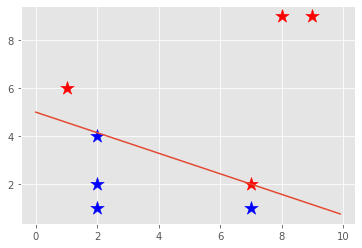

In [12]:
obkect.done(finalweights)#draw only if 2 classes

In [13]:
print("The number of iterations taken for convergence   ",obkect.iteration)

The number of iterations taken for convergence    28


In [14]:
for row in datasetforq5:
    prediction = obkect.predict(row, finalweights)
    print("Expected=%d, Predicted=%d" % (row[-1], prediction))

Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
